In [140]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import inspect

In [79]:
engine = create_engine("sqlite:///hawaii.sqlite")
insp = inspect(engine)
insp.get_table_names()

['measurement', 'station']

In [80]:
conn = engine.connect()
stationdf = pd.read_sql("select * from station", conn)
measurementdf = pd.read_sql("select * from measurement", conn)

In [81]:
stationdf.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [82]:
measurementdf.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [131]:
base = automap_base()
base.prepare(engine, reflect=True)
basemeasure = base.classes.measurement
basemeasure

sqlalchemy.ext.automap.measurement

In [132]:
base = automap_base()
base.prepare(engine, reflect=True)
basestation = base.classes.station
basestation

sqlalchemy.ext.automap.station

In [133]:
measurementdf["date"].max()

'2017-08-23'

In [134]:
dateprec = session.query(measurement.date, func.sum(measurement.prcp)).filter(measurement.date>'2016-08-23').\
group_by(measurement.date).order_by(measurement.date.desc()).all()


In [135]:
dateprecdf = pd.DataFrame(dateprec)
dateprecdf.rename(columns={0:"Date", 1:"Precipitation"}, inplace = True)
dateprecdf.set_index("Date", inplace = True)
dateprecdf

,Precipitation
Date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09
...,...
2016-08-28,3.10
2016-08-27,0.32
2016-08-26,0.10


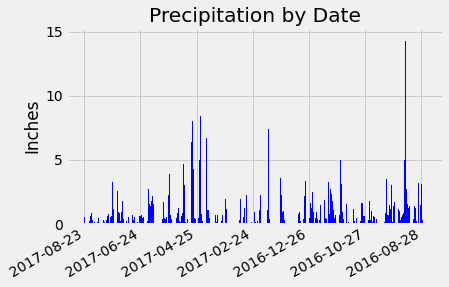

In [152]:
dates = dateprecdf.reset_index()['Date']
prec = dateprecdf['Precipitation']

fig, ax=plt.subplots()
plt.bar(dates,prec,align='center',color = 'blue'),
myLocator = mticker.MultipleLocator(60)
ax.xaxis.set_major_locator(myLocator),
plt.ylabel('Inches'),
plt.title('Precipitation by Date'),
plt.ylim(0,dateprecdf['Precipitation'].max() + 1),
fig.autofmt_xdate(),
plt.show()

In [124]:
print(dates)

[17006. 17034. 17062. 17090. 17118. 17146. 17174. 17202. 17230. 17258.
 17286. 17314. 17342.]
